#### Pasos
1. Carga de datos
2. Análisis exploratorio de los datos (EDA)
3. Preparación de los datos
4. Modelado
5. Evaluación

#### Información del DataSet
El conjunto de datos informa características de morosidad para 5960 préstamos con garantía hipotecaria. Un prestamo con garantía hipotecaría es un préstamo en el que el deudor utiliza el capital de su casa como garantía subyacente

- **0 BAD:** 1 = Candidato con préstamos incumplidos o con mora; 0 = candidato que paga su deuda y no tiene registro negativo
- **1 LOAN:** Monto de solicitud de préstamos
- **3 MORTDUE:** Monto adeudado de la hipoteca existente
- **4 VALUE:** Valor actual del bien o propiedad
- **5 REASON:** DebtCon = consolidación de la deuda; Homelmp = mejoras para el hogar
- **6 JOB:** Categorías ocupacionales o profesionales
- **7 YOJ:** Años en su trabajo actual
- **8 DEROG:** Número de informes derogados o cancelados importantes
- **9 DELINQ:** Numero de lineas de crédito morosas
- **10 CLAGE:** Antiguedad de la linea de crédito más antigua en meses
- **11 NINQ:** Número de consultas crediticias recientes
- **13 CLNO:** Número de lineas de crédito
- **14 DEBTINC:** relación deuda-ingreso


# 1. Carga de datos

## 1.1 Importamos librerias

In [60]:
# Tratamiento de datos
# ====================================================================
import pandas as pd
import numpy as np
from tabulate import tabulate
import pickle

# Graficos
# ====================================================================
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from scipy import constants

# Codificador para variables categoricas
# ====================================================================
from sklearn.preprocessing import OneHotEncoder

# Para estandarizar nuestros datos
# ====================================================================
from sklearn.preprocessing import RobustScaler, Normalizer

# Division del dataset en train y test
# ====================================================================
from sklearn.model_selection import train_test_split, GridSearchCV

# Entrenamiento del modelo
# ====================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluación
# ====================================================================
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from prettytable import PrettyTable # lo usamos para imprimir una tabla con formato bonito

# Ocultando las advertencias
# ==================================================================
import warnings
warnings.filterwarnings('ignore')


## 1.2 Cargamos el dataset

In [61]:
df = pd.read_csv('data.csv')

# 2. Análisis exploratorio de los datos (EDA)

## 2.1 Primeras entradas

In [62]:
# Devolvemos las primeras filas del DataFrame
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [63]:
# Dimension del dataset
df.shape

(5960, 13)

## 2.2 Columnas

In [64]:
# Columnas de nuestros dataset
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [65]:
# Tipo de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


###### Observaciones
* Tenemos columnas cuyo tipo de dato es “object”, estas columnas se pueden considerar como clasificadores, más adelante haremos una transformación de datos para poder aplicar el algoritmo de regresión logística el cual necesita que los tipos de datos sean numéricos. Una solución es distinguir cada tipo de object y crearles una tabla, para las tuplas en las que previo a la transformación de datos llevaba el nombre de la tabla en el atributo llevará un 1 y si no, un 0.
* Podemos identificar que no tenemos tablas nulas.


## 2.3 Datos ausentes

In [66]:
# Numeros de datos ausentes por variable
df.isna().sum().sort_values()

BAD           0
LOAN          0
VALUE       112
CLNO        222
REASON      252
JOB         279
CLAGE       308
NINQ        510
YOJ         515
MORTDUE     518
DELINQ      580
DEROG       708
DEBTINC    1267
dtype: int64

###### Observación
* Exceptuando las variables BAD y LOAN el dataset contiene muchos datos ausentes

## 2.4 Análisis de variables individuales

### 2.4.1 Análisis de datos cuantitativos

In [67]:
# Distribucion de variables numericas
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


##### Histogramas de las variables numéricas

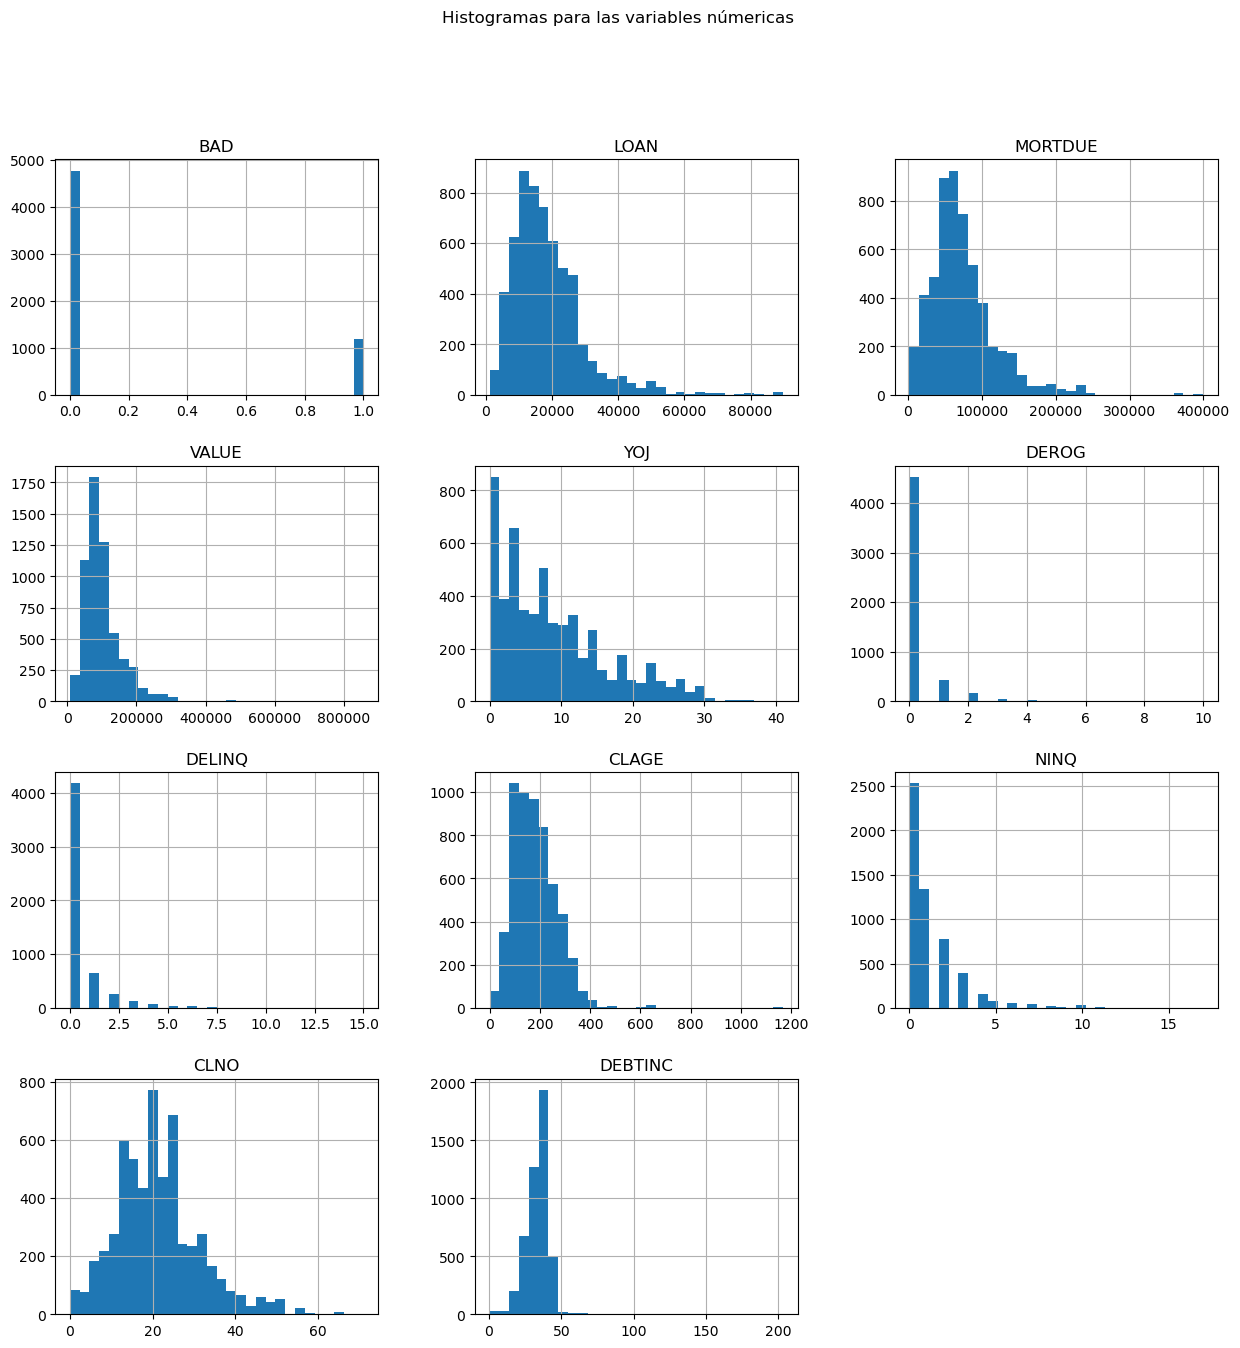

In [68]:
# histograma de las variables numericas

# No tomamos en cuenta las variables categoricas
df.drop(['REASON', 'JOB'],axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histogramas para las variables númericas")
plt.show()

##### Porcentaje de variable Target

In [69]:
# Funcion para crear graficos de barra que muestre un porcentaje

def perc_on_bar(plot, feature):
    # longitud de la columna
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # porcentaje de cada clase
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()       
        # anotamos el porcentaje
        ax.annotate(percentage, (x, y), size = 12)
        
    plt.show() # show the plot

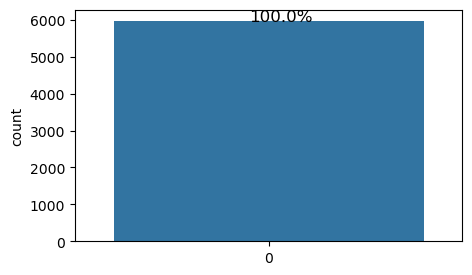

In [70]:
# Mostramos el grafico de barras de BAD con sus porcentajes 
plt.figure(figsize=(5,3))
ax = sns.countplot(df["BAD"],palette="tab10")
perc_on_bar(ax,df["BAD"])

###### Observaciones
* BAD - La distribución de la variable objetivo está desequilibrada, los 0 son alrededor del 80% y los 1 son alrededor del 20%. Antes de implementar un modelo predictivo debemos de balancear esto.
* Las variables cuantitativas muestran, en todos los casos, distribución asimétrica a la izquierda.
* LOAN - Los montos de los préstamos se concentran hasta 20.000,00, con algunos valores extremos por encima de 80.000,00
* DEBTINC - que es la relación entre la deuda y los ingresos, es decir la capacidad de pago, tiene una mayor concentración entre 30 y 40.
* MORTDUE variable - que verifica el monto adeudado de la hipoteca, muestra que la mayoría de los clientes tienen deudas que oscilan entre 40,000 y 80,000
* YOJ - son los años trabajados en el puesto actual. La mayoría trabaja hasta 5 años en la empresa, algunos clientes trabajan más de 40 años (pero este no es el estándar)
* VALUE - Que verifica los valores de los inmueble. Muestra que la mayoría de los inmuebles están tasados entre 50.000 y 100.000, con casos de inmuebles por encima de los 400.000
* CLAGE - verifica la antigüedad en meses de la mayor línea de crédito, la concentración es entre 100 y 300 meses (entre 8 y 25 años) en que se adquirió la primera línea de crédito.
* CLNO - comprueba cuántas líneas de crédito tiene el cliente. La mayoría tiene entre 10 y 25 líneas de crédito.
* DEROG - cantidad de informes cancelados, la concentración está entre 1 y 2.
* DELINQ - Número de líneas de crédito morosas, se concentran entre 0 y 2,5.
* Podemos limitar los valores que son muy altos a un valor más bajo seleccionado, pero esto podría ocacionar perdida de información, cambios en la distribución de los datos y ocasionar sesgos en los resultados, por ende no lo haremos.

### 2.4.2 Análisis de datos cualitativos

#### Comportamiento general de las variables categóricas

In [71]:
# Comportamiento de las variables categoricas
df.describe(include="O")

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [72]:
# Seleccionamos solo las columnas de variables categoricas
df.select_dtypes(include= ["O"]).columns

Index(['REASON', 'JOB'], dtype='object')

#### Variable REASON

In [73]:
# Se divide la columna REASON por grupo de valores
df.groupby("REASON").size().sort_values()

REASON
HomeImp    1780
DebtCon    3928
dtype: int64

In [74]:
# Visualizamos
ax = sns.countplot(df["REASON"],palette="tab10")
perc_on_bar(ax,df["REASON"])

ValueError: could not convert string to float: 'HomeImp'

#### Variable JOB

In [ ]:
# Se divide la columna JOB por grupo de valores
df.groupby("JOB").size().sort_values()

In [ ]:
# Visualizamos
plt.figure(figsize=(5,3))
ax = sns.countplot(df["JOB"],palette="tab10")
perc_on_bar(ax,df["JOB"])

###### Observaciones
* REASON: 2 (HomeImp, DebtCon) tenemos que la mayoría de las personas piden prestamos para pagar otros (65.9%).
* JOB: 6 (Other, Office, Sales, Mgr, ProfExe, Self) vemos que la mayoría de las personas que piden prestamos trabajan en Mgr(12.9%), oficina(15.9%), ProfExe(21.4%) y en otros (40.1%).

## 2.5 Análisis de dependencias

### Obs 1 - Mapa de correlación
Mediante un mapa de correlación vemos una primera vista del tipo de relación que existe en las variables del conjunto de datos. Para ello ignoraremos las variables categóricas y la variable target (objetivo).

El mapa de correlación es útil porque permite identificar rápidamente las variables que están altamente correlacionadas y aquellas que tienen una baja correlación. Esto puede ayudar a los analistas a reducir la dimensionalidad de los datos, identificar patrones y relaciones entre las variables, y seleccionar las variables más importantes para la modelización y la predicción.

Lo interpretamos de la siguiente forma:
 * Los tonos más calidos indican una alta correlación entre las variables
 * Los tonos más frios indican una baja correlación
 * Una correlación positiva entre dos variables se indica con un valor cercano a 1, lo que significa que ambas variables se mueven en la misma dirección. Por ejemplo, si una variable aumenta, la otra variable también tiende a aumentar.
 * Una correlación negativa se indica con un valor cercano a -1, lo que significa que las dos variables se mueven en direcciones opuestas. Por ejemplo, si una variable aumenta, la otra variable tiende a disminuir.



In [ ]:
# Eliminar columnas 'BAD', 'JOB' y 'REASON' del dataframe
df_corr = df.drop(['BAD', 'JOB', 'REASON'], axis=1)


In [ ]:
# Calcular la correlación de Pearson
correlacion = df_corr.corr(method='pearson')

In [ ]:
# Mostrar el mapa de calor
plt.figure(figsize=(15,15))
sns.heatmap(correlacion, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion", fontsize=18)
plt.show()

###### Observaciones
* La variable "VALUE" tiene una fuerte correlación con "MORTDUE", lo que indica que si el valor de una casa es alto, es probable que la cantidad adeudada de la hipoteca existente también lo sea. 
* Se encontró que la correlación entre "VALUE" y "LOAN" es baja, lo que sugiere que los propietarios de viviendas de alto valor no necesitan solicitar grandes préstamos con garantía hipotecaria. En lugar de ello, las personas que sufren de problemas financieros suelen ser las que solicitan estos préstamos. Estos hallazgos son importantes para entender la relación entre estas variables en el análisis de credit scoring.

### Obs 2 - Relación REASON, YOJ Y LOAN

In [ ]:
#  Mostramos las 10 solicitudes de prestamos más importantes
df.nlargest(10, 'LOAN')[['REASON', 'YOJ', 'LOAN']].style.hide_index()

###### Observación
Podemos ver que los 10 prestamos más grandes, es decir con el monto más elevado fueron en personas que mantienen su trabajo desde hace 14,15 y 16 años, y con el motivo de solicitar la consolidación de deuda.

### Obs 3 - Relación MORTDUE, YOJ

In [ ]:
# Mostramos las 10 personas con más tiempo en la empresa
df.nlargest(10, 'YOJ')[['MORTDUE', 'YOJ']].style.hide_index()

###### Observaciones
* Observamos las 10 personas que llevan más tiempo en su trabajo para saber cuales son las que están en mejor condición para seguir pagando el prestamo. 
* Notamos que las personas con el trabajo más estable rondan entre 35 a 41 años en su trabajo y tienen un monto elevado adeudado de la hipoteca existente.

## 2.6 Análisis de variable objetivo BAD
Estudiaremos un poco sobre la variable BAD ya que nos interesa entender cómo se comporta con respecto a las otras variables

### OBS 1 -  Análisis del comportamiento de BAD - Variables categóricas

In [ ]:
# Separamos buen pagador de mal pagador
df.loc[df.BAD == 1, 'ESTADO'] = 'MAL_PAG'
df.loc[df.BAD == 0, 'ESTADO'] = 'BUEN_PAG'

In [ ]:
# BAD vs JOB
g = df.groupby('JOB')
g['ESTADO'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

In [ ]:
# BAD vs REASON
g = df.groupby('REASON')
g['ESTADO'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

###### Observaciones
* Como ya mencionamos antes, se observa un gran desbalance en los datos contenidos en la variable objetivo, ya que contamos con más préstamos cumplidos que incumplidos, por lo que habrá que realizar luego un balanceo en esta variables.
* El comportamiento de la variable BAD respecto a la variable JOB y la variable REASON por el momento no nos dice mucho, ya que tenemos nuestra clase objetivo desbalanceada (nuestro dataset posee más datos de prestamos cumplidos que no cumpidos) Pero aún así podemos decir lo siguiente: 
 * BAD VS JOB - En este caso el trabajo toma más influencia respecto a si el cliente paga o no el préstamo. Los trabajadores de oficina (office) y los ejecutivos profesionales (profExe) tienen la mayor probabilidad de ser buenos pagadores de sus préstamos, mientras que los trabajadores de ventas (sales) y por cuenta propia (self) tienen la mayor probabilidad de ser malos pagadores. 
 * BAD VS REASON - Vemos que la razón de la adquisición de un préstamo no tiene mucho que ver con si el cliente es o no un mal pagador. Ya sea que haya adquirido el préstamo para mejoras en el hogar o consolidación de deuda.

In [ ]:
# Ahora eliminamos la variable estado
df = df.drop('ESTADO', axis=1)

### OBS 2- Análisis del comportamiento de BAD - Variables numericas

In [ ]:
# Estadísticas descriptivas de prestamos PAGADOS - Variables númericas
df[df['BAD']==0].drop('BAD', axis=1).describe().style.format("{:.2f}")

In [ ]:
# Estadísticas descriptivas de prestamos INCUMPLIDOS - Variables númericas
df[df['BAD']==1].drop('BAD', axis=1).describe().style.format("{:.2f}")

##### Gráficas

In [ ]:
sns.boxplot(df["BAD"],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['MORTDUE'])

In [ ]:
sns.boxplot(df["BAD"],df['VALUE'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['YOJ'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['DEROG'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['DELINQ'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['CLAGE'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['NINQ'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['CLNO'],palette="tab10")

In [ ]:
sns.boxplot(df["BAD"],df['DEBTINC'],palette="tab10")

###### Observaciones

De las estadísticas anteriores podemos decir que:
* El monto del préstamo solicitado (LOAN), el monto de la hipoteca adeudada (MORTDUE) y el valor actual del bien o propiedad (VALUE) son estadísticamente consistentes tanto para los préstamos que fueron PAGADOS como para los que resultaron en INCUMPLIMIENTO. Esto quiere decir que esas variables pueden no proporcionar un poder de discriminación significativo para separar las dos clases de la variable objetivo.
* El número de años en el trabajo actual (YOJ) parece discriminar las dos clases, ya que los INCUMPLIMIENTOS parecen más frecuentes en los contratistas que tienen una antigüedad más corta. Esta tendencia está respaldada por los cuantiles de valor promedio correspondientes, que indican una distribución sesgada hacia una antigüedad más corta.
* Se aplican consideraciones similares a las variables relacionadas con el historial crediticio del contratista, tales como: el número de informes despectivos importantes (DEROG), el número de líneas de crédito morosas (DELINQ), la antigüedad de la línea de crédito más antigua en meses (CLAGE) y el número de consultas crediticias recientes (NINQ). En el caso de INCUMPLIMIENTO, la distribución de estas variables está sesgada hacia valores que sugieren una historia crediticia peor que la distribución correspondiente para los contratistas de préstamos PAGADOS.
* Finalmente, el número de líneas de crédito abiertas (CLNO) parece estadísticamente consistente en ambos casos, lo que sugiere que esta variable no tiene un poder de discriminación significativo.

# 3. Preparación de los datos

## 3.1 Limpieza de datos
### 3.1.1 Tratamiento de datos nulos

Cómo observamos en la fase EDA la data tiene valores NaN, por ello algunos se van a rellenar con la media (valores numericos) o la moda (para categorias)


In [ ]:
# Rellenamos la data de variables categoricas con la moda
for column in ['REASON','JOB']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Rellenamos la data de variables númericas con la media
for column in ['VALUE','CLNO','CLAGE','NINQ','YOJ','MORTDUE','DELINQ','DEROG','DEBTINC']:
    df[column].fillna(round(df[column].mean()), inplace=True)

del column 

# Mostramos el contenido de la tabla
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):
    display(df)

In [ ]:
# Verificamos que no nos queden mas datos por NaN por variable
df.isna().sum().sort_values()

### 3.1.2 Columnas irrelevantes

Una columna irrelevante puede ser:

* Una columna que contiene información relevante para el problema que queremos resolver
* Una columna categórica pero con un sólo nivel
* Una columna numérica pero con un sólo valor
* Columnas con información redundante De igual manera, si nos encontramos con la duda de si alguna columna puede ser relevante o no, lo que haremos será dejarla (y más adelante en posteriores etapas podremos darnos cuenta si se debe preservar o no).

In [ ]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['JOB', 'REASON']
for col in cols_cat:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

###### Observación
Todas las columnas categóricas presentan más de 1 subnivel. No eliminaremos ninguna.

In [ ]:
# Vemos que no haya columnas numéricas con un sólo valor
df.describe()

###### Observación
En este caso la desviación estandas es diferente a 0 en todos los casos, es decir que tenemos valores diversos en todas las columnas númericas. No eliminaremos ninguna columna.

### 3.1.3 Filas repetidas

In [ ]:
print(f'Tamanio del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamanio del set despues de eliminar las filas repetidas: {df.shape}')

###### Observación
El dataset no contenía filas repetidas

### 3.1.4 Outliers en las variables numéricas
Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [ ]:
# Generamos gráficas individuales pues las variables numéricas
# estan en rangos diferentes
cols_num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
            'CLAGE', 'NINQ', 'CLNO','DEBTINC']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

# Con este grafico tipo boxplot vamos a poder ver que valores se estan 
# saliendo del rango normal que tienen esas cantidades numericas
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

    

###### Observaciones
* No tenemos valores negativos
* En la variable CLAGE que es la antiguedad de línea de crédito más antigua en meses, tenemos que algunas superan las 600. Entonces nuestro criterio será realizar un recorte de los datos de CLAGE > 600 ya que los consideramos valores atípicos

####  Recorte (capping)
* Cambia el valor de los outliers a los límites inferior y superior definidos en la detección.
* Ventaja: preserva la cantidad de datos original
* Desventaja: modifica la distribución de los datos 


In [ ]:
# Establecemos el valor máximo para la edad
valor_maximo = 600

# Establecemos el límite superior de edad para aplicar la técnica de capping
limite_superior = 600

# Aplicamos la tecnica de capping solo a los valores que exceden el límite superior de 100
df.loc[df['CLAGE'] > limite_superior, 'CLAGE'] = valor_maximo

# Visualizamos la modificación
plt.boxplot(df["CLAGE"], vert=False, patch_artist=True)
plt.show()


### 3.1.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes. Se deben unificar estos sub-niveles.

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['JOB', 'REASON']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

###### Observación
No se observan errores tipográficos en las variables categoricas.

### 3.1.6 Transformación de datos
Como comentamos anteriormente, todas las columnas deben ser de tipo numéricas, y para corregir las que son de tipo object vamos aplicar una técnica llamada One-Hot la cual consiste en crear columnas para cada valor del object y rellenarlas con 0 y 1 si corresponde o no.

#### Trasnformación variable JOB

In [ ]:
# Le cambiamos el tipo de la columna JOB de object a category
df["JOB"] = df["JOB"].astype("category")

# Creamos un objeto OneHotEncoder
codificador = OneHotEncoder()

# Codificamos la variable categórica "JOB"
codificacion = codificador.fit_transform(df[["JOB"]])

# Obtenemos los nombres de las nuevas columnas
nombres_columnas = codificador.get_feature_names(["JOB"])

# Creamos un nuevo DataFrame con las nuevas columnas
nuevas_cols = pd.DataFrame(codificacion.toarray(), columns=nombres_columnas)

# Concatenamos el nuevo DataFrame con el DataFrame original
df = pd.concat([df, nuevas_cols], axis=1)

# Borramos la columna categórica original
df.drop("JOB", axis=1, inplace=True)

# Visualizamos el contenido de nuestros datos
print(df.head())

##### Transformación variables REASON

In [ ]:
# Le cambiamos el tipo de la columna JOB de object a category
df["REASON"] = df["REASON"].astype("category")

# Codificamos la variable categórica "JOB"
codificacion = codificador.fit_transform(df[["REASON"]])

# Obtenemos los nombres de las nuevas columnas
nombres_columnas = codificador.get_feature_names(["REASON"])

# Creamos un nuevo DataFrame con las nuevas columnas
nuevas_cols = pd.DataFrame(codificacion.toarray(), columns=nombres_columnas)

# Concatenamos el nuevo DataFrame con el DataFrame original
df = pd.concat([df, nuevas_cols], axis=1)

# Borramos la columna categórica original
df.drop("REASON", axis=1, inplace=True)

# Visualizamos el contenido de nuestros datos
print(df.head())

In [ ]:
# visualizamos nuevamente todas nuestras columnas
df.columns


###### Observaciones
* Se puede observar que las categorias JOB y REASON fueron convertidas a números
* Se observa que por cada categoria al final de la tabla se ha añadido una variable dummy.

## 3.3 Estandarización

### 3.2.1 Graficando los datos en escala original

In [ ]:
# Identificamos las columnas numéricas a graficar
numeric_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 
                'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Graficamos los datos en escala original
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))
axs = axs.flatten()

# Graficamos todos los datos juntos
for i, col in enumerate(numeric_cols):
    axs[0].plot(df[col], linewidth=0.5, label=col)

axs[0].legend(loc='upper right')
axs[0].set_title("Datos Originales Juntos")

# Graficamos cada variable por separado
for i, col in enumerate(numeric_cols):
    axs[i+1].plot(df[col], linewidth=0.5, label=col, color='C'+str(i))
    axs[i+1].legend(loc='upper right')
    axs[i+1].set_title(col)

# Ajustamos los espacios entre subplots
plt.tight_layout()
plt.show()

###### Observaciones
En la primera subfigura podemos visualizar que la mayoría de los datos pasan desapercibidos, no podemos realizar un buen análisis de todos ellos ya que se encuentran en diferentes magnitudes. Por ende para poder tener un estandar y así poder homogeneizar, vamos a proceder a escalar todos estos datos para tener una unidad de medida que nos ayude  a visualizar mejor y realizar un mejor análisis.

Ahora bien, cuando graficamos las demás columnas de nuestros datos podemos visualizar que si tenemos muchos datos para analizar, pero al graficarlos todos juntos, por la escala que tienen algunas columnas (escalas muy grandes), no permite que apreciemos los demás datos.


### 3.3.1 Robust Scaler 
El método RobustScaler es una técnica de escalamiento que se utiliza para preparar datos numéricos en el aprendizaje automático. La idea detrás del escalamiento robusto es hacer que los datos sean más resistentes (robustos) a valores atípicos (outliers) en la distribución de los datos.

Sus ventajas son: 
* Su principal ventaja es que es resistente a los valores atípicos, lo que significa que estos no afectarán significativamente la escala de los datos. 
* RobustScaler preserva la forma de la distribución original de los datos y no requiere que sigan una distribución específica, lo que lo hace útil para conjuntos de datos grandes y complejos.



In [ ]:
# Separamos la variable objetivo y variables dummy
cols_to_ignore =['BAD','JOB_Mgr', 'JOB_Office',
       'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self', 'REASON_DebtCon',
       'REASON_HomeImp']

# Ignoramos las variables dummy y la objetivo
X = df.drop(cols_to_ignore, axis=1)

# Inicializamos el scaler
df_robust_scaler = RobustScaler()

# Estandarizamos las variables predictoras
df_robust_scaler = df_robust_scaler.fit_transform(X)

# Creamos un nuevo DataFrame con las variables estandarizadas y la variable objetivo
df_scaled = pd.concat([df[cols_to_ignore], pd.DataFrame(df_robust_scaler, columns=X.columns)], axis=1)

# Graficamos los datos escalados con un KDE plot
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    sns.kdeplot(df_robust_scaler[:, i], label=column)
plt.legend()
plt.show()

## 3.2 Normalización


### 3.2.2 Normalizer
La normalización se utiliza para escalar los valores de las características de un conjunto de datos a un rango específico.

In [ ]:
# Separamos la variable objetivo y variables predictoras
y = df_scaled['BAD'] 

# Ignoramos solo laa variable objetivo
X = df_scaled.drop(['BAD'], axis=1)

# Inicializamos 
df_normalizer = Normalizer()

# Normalizamos las variables predictoras
df_normalizer = df_normalizer.fit_transform(X)

# Graficamos los datos escalados con un KDE plot
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    sns.kdeplot(df_normalizer[:, i], label=column)
plt.legend()
plt.show()

In [ ]:
# Visualizamos las densidades de cada variable luego se haber sido escaladas

# Convertimos X_scaled en un DataFrame de pandas antes de usar el método plot()
X_scaled_df = pd.DataFrame(df_normalizer, columns=X.columns)
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
X_scaled_df.plot(ax=ax, kind='density', subplots=True, layout=(5,4), sharex=False)
plt.show()

In [ ]:
# Concatenamos la variable objetivo con las variables predictoras escaladas y las variables dummy
df_scaled = pd.concat([y, pd.DataFrame(df_normalizer, columns=X.columns)], axis=1)

# Mostramos el resultado
print(df_scaled.head())

## 3.4 Selección de características

### 3.4.1 Análisis de correlación

In [ ]:
# Correlacion de pearson basado en metodos estadísticos
df_corr = df_scaled.copy()
correlacion = df_corr.corr(method='pearson')
# Correlacion entre caracteriscticas
correlacion 

In [ ]:
df_corr.info()

In [ ]:
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion", fontsize=18)
plt.show()

###### Nota
Hacemos un análisis de cómo es la relación entre las variables, ya que lo que no queremos en este tipo de modelos es que entre variables haya algún vínculo importante ya que esto
afectaría el nivel de performance del modelo. 
Por otro lado, lo que si queremos visualizar es que haya un mayor grado de interacción entre las variables independientes y las dependientes.

In [ ]:
df_corr['BAD'] = df_corr['BAD'].astype(int)
correlation = df_corr.corr()

In [ ]:
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion", fontsize=18)
plt.show()

###### Observaciones
Las variables más correlacionadas con el estado del préstamo (BAD) son aquellas relacionadas con el historial crediticio (DELINQ, DEROG, NINQ), lo que indica que estas variables tendrán un mayor poder discriminativo. Además, estas variables presentan una leve correlación entre sí, lo que sugiere que parte de la información que proporcionan podría ser redundante.


In [ ]:
relevante_features = correlation[correlation>0.16]
relevante_features

###### Observación
Acá hacemos un análisis más profundo para visualizar las correlaciones que son mayores al grado de correlación > 0.16. Cuando visualizamos la fila que representa a la interacción entre las posibles variables predictoras y la variable target, obtenemos que DEROG, DELINQ y NINQ son las que más se correlacionan con BAD cómo ya hemos mencionado antes. Las demás variables no explican mucho el modelo.

In [ ]:
cor_target = abs(correlation['BAD'])
cor_target

###### Observación
De esta observación sacamos que:
* La variable que tiene más interacción con BAD es DELINQ con 0.319108, mientras que la variable menos relacionada con BAD es JOB_Mgr con  0.003734, esta interacción es casi 0 así que procederemos a eliminar esta columna, ya que no mejora el modelo. Por otro lado tambíen eleminaremos la variable 'JOB_Other' ya que tiene 1% de interacción con BAD .
* Además entre las variables REASON_DebtCon y REASON_HomeImp existe una relación lineal perfectamente inversa entre ellas. o sea que cuando una variable aumenta en valor la otra variable disminuye exactamente la misma proporción. Basicamente se está presentando una multicolinealidad perfecta entre ellas, por lo que la presencia de ambas variables no aporta información al modelo. Para evitar esta multicolinealidad eliminaremos la columna REASON_HomeImp.


##### Eliminación columna JOB_Mgr y REASON_HomeImp

In [ ]:
# Eliminamos la columna JOB_Mgr y REASON_HomeImp
df_scaled = df_scaled.drop(['JOB_Mgr', 'REASON_HomeImp', 'JOB_Other'] , axis=1)

In [ ]:
# Visualizamos las columnas
df_scaled.columns

In [ ]:
# Visualizamos la información de nuestro dataset
df_scaled.info()

### 3.4.2 Selección de variables relevantes

In [ ]:
cor_target = abs(correlation['BAD'])
relevant_features = cor_target[cor_target>0.07]
relevant_features

###### Nota 1
Acá seleccionamos las mejores características del modelo. No todas las variables son las que mejor son las que mejores nos van a explicar el modelo, hay algunas variables que sí explican mejor el modelo y otras que no, que en vez de aplicar un mejor ajuste nos añaden distorsión al modelo.

###### Observaciones
Observamos las variables que tengan mayor interacción con BAD que sea el 7%.

###### Nota 2
Cómo estas variables no sobrepasan el 50% que es lo que muchos autores nos dicen que es el porcentaje de interacción que tiene que haber entre la variable target y las predictoras para que puedan ser explicativas, entonces procederemos a utilizar todas las variables. Si hubiese sido el caso en que una variable explica más el modelo, nos hubieramos quedado con esa variable.


## 3.5 División de los datos en conjunto de entrenamiento y prueba

In [ ]:
df_features = df_scaled.copy()

In [ ]:
# Creamos nuestra varible dependiente e independientes
X = df_features.drop(['BAD'],axis=1) # Varibles independientes o explicativas
Y = df_features["BAD"] # Variable dependiente riesgo crediticio


In [ ]:
# Separamos los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Creamos una tabla con los datos de entrenamiento y la variable objetivo
train_data = pd.concat([X_train, y_train], axis=1)

print("Datos del conjunto de entrenamiento".center(50, " ") + "\n")
print ("\n" + "Información general ".center(50, "="))
print(train_data.info())
print("\n" + "Dimension del conjunto ".center(50, "="))
print(train_data.shape)


In [ ]:
# Separamos de nuestros datos de entrenamiento los datos BAD = 0 - Buen pagado BAD = 1 - Mal pagador
cant_buen_pag = train_data['BAD'].value_counts()[0]
cant_mal_pag = train_data['BAD'].value_counts()[1]

In [ ]:
print("Porcentaje de datos de prestamos cumplidos y prestamos incumplidos".center(50, "=") + "\n")
print (y_train.value_counts(normalize=True) * 100, "\n")
print("\n" + "Cantidad de prestamos cumplidos".center(50, "="))
print(cant_buen_pag)
print("\n" + "Cantidad de prestamos incumplidos".center(50, "="))
print(cant_mal_pag)


###### Observaciones
Como ya hemos mencionado anteriormente, nuestra variable objetivo se encuentra desbalanceada, por ende deberemos balancearla. Esto es importante debido a que como distribución de la clase es muy desigual puede afectar el desempeño del modelo

Si la clase minoritaria (la que tiene menos instancias) tiene una tasa de precisión muy baja, puede que el modelo tienda a predecir siempre la clase mayoritaria, obteniendo así un alto porcentaje de precisión global, pero un desempeño pobre para la clase minoritaria. Esto se debe a que el modelo estará sesgado hacia la clase mayoritaria, lo que podría llevar a que no se detectan bien los casos de la clase minoritaria.


# 4 Modelados

## 4.1 Balanceo de clase
Para balancear la clase lo que haremos será usar la técnica de asignación de pesos. Esta es una técnica adecuada para conjuntos de datos en los que la clase minoritaria no es muy pequeña, cómo sucede en este caso, ya que nuestra clase minoritaria posee un 20% de data.

**Ventajas de la técnica de balance asignación de pesos**
* Fácil de implementar.
* Mayor precisión en la clasificación
* Evita el sobreajuste
* Tiene en cuenta la distribución real de las clases
* Reduce el costo computacional


In [ ]:
# Definimos los pesos para obtener un buen balance
class_weights = {0: 1, 1: 7.1}

## 4.2 Selección del modelo
Vamos a entrenar distintos modelos para luego determinar cúal nos da una mejor predicción para así definir cual será el modelo definitivo que seleccionaremos.

### 4.2.1 Modelo N°1 - 
#### Regresión Logistica

In [ ]:
# Creamos el modelo seleccionando el algoritmo de egresión logística y 
# Asignamos los pesos que acabamos de calcular a traves del prámetro 'class_weigth'
lr_model1 = LogisticRegression(class_weight=class_weights, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
%time lr_model1.fit(X_train, y_train)

### 4.2.2 Modelo N°2
#### Regresión Logistica con mejores parametros

In [ ]:
# Definimos los parámetros a explorar para la Regresión Logística
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [{0: 1, 1: 7.1}, {0: 1, 1: 7.10}, {0: 1, 1: 7.15}]
}

# Definimos el modelo de Regresión Logística
lr_model2 = LogisticRegression(random_state=42)

# Realizar la búsqueda en cuadrícula para la Regresión Logística
lr_grid = GridSearchCV(lr_model2, lr_param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Obtenemos los mejores parámetros y el mejor puntaje de validación cruzada para la Regresión Logística
lr_best_params = lr_grid.best_params_
lr_best_score = lr_grid.best_score_

# Imprimimos los resultados de la búsqueda en cuadrícula
print(f"Mejores hiperparámetros encontrados: {lr_best_params}")
print(f"Puntaje de validación cruzada promedio con los mejores hiperparámetros: {lr_best_score}")

# Entrenamos el modelo de Regresión Logística con los mejores parámetros
lr_model2 = LogisticRegression(**lr_best_params, random_state=42)
%time lr_model2.fit(X_train, y_train)

### 4.2.3 Modelo N°3
#### Random Forest

In [ ]:
# Creamos el modelo seleccionando el algoritmo Random Forest
rf_model3 = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
%time rf_model3.fit(X_train, y_train)

### 4.2.4 Modelo N°4
#### Random Forest con mejores parametros

In [ ]:
# Definimos los parámetros a explorar para el algoritmo de Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'class_weight': [{0: 1, 1: 7.1}, {0: 1, 1: 10}, {0: 1, 1: 15}]
}

# Definimos el modelo de Random Forest
rf_model4 = RandomForestClassifier(random_state=42)

# Realizamos la búsqueda en cuadrícula para Random Forest
rf_grid = GridSearchCV(rf_model4, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Obtenemos los mejores parámetros y el mejor puntaje de validación cruzada para Random Forest
rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

# Imprimimos los resultados de la búsqueda en cuadrícula
print(f"Mejores hiperparámetros encontrados: {rf_best_params}")
print(f"Puntaje de validación cruzada promedio con los mejores hiperparámetros: {rf_best_score}")

# Entrenamos el modelo de Random Forest con los mejores parámetros
rf_model4 = RandomForestClassifier(**rf_best_params, random_state=42)
%time rf_model4.fit(X_train, y_train)

## 4.4 Verificación del balance

In [ ]:
# Visualizamos que efectivamente se realizó un buen balance en nuestro modelo
y_train_pred = lr_model1.predict(X_train)
counts_after = pd.Series(y_train_pred).value_counts()

print("="*80)
print("Distribución de las clases después de aplicar la técnica de asignación por pesos ".
      center(50, "=") + "\n", counts_after)
print("="*80)

###### Observación
El peso que asignamos para balancear la clase fue bueno

# 5 Evaluación

Para evaluar nuestro modelo haremos uso de las siguientes metricas de para modelos de clasificación:
* **Exactitud (accuracy):** mide la proporción de predicciones correctas realizadas por el modelo. Es decir, la cantidad de veces que el modelo acertó dividido por el número total de predicciones. La exactitud se expresa como un valor entre 0 y 1, siendo 1 el valor ideal de una predicción perfecta. En general, un valor alto de exactitud indica que el modelo es preciso y puede ser útil.

* **precisión (precision):** mide la proporción de verdaderos positivos (TP) sobre todos los positivos predichos (TP + FP). Es decir, la cantidad de veces que el modelo identificó correctamente un resultado positivo, dividido por el número total de resultados positivos predichos. La precisión se expresa como un valor entre 0 y 1, siendo 1 el valor ideal de una precisión perfecta. Una alta precisión indica que el modelo es muy cuidadoso al predecir los resultados positivos y rara vez da falsos positivos.

* **sensibilidad (recall o true positive rate):** mide la proporción de verdaderos positivos (TP) sobre todos los verdaderos positivos y falsos negativos (TP + FN). Es decir, la cantidad de veces que el modelo identificó correctamente un resultado positivo, dividido por el número total de resultados positivos reales. La sensibilidad se expresa como un valor entre 0 y 1, siendo 1 el valor ideal de una sensibilidad perfecta. Una alta sensibilidad indica que el modelo es capaz de identificar la mayoría de los resultados positivos.

* **F1 (F1 score):** es una medida combinada de la precisión y la sensibilidad, que se calcula como la media armónica de ambas medidas. El valor F1 se expresa como un valor entre 0 y 1, siendo 1 el valor ideal de un modelo perfecto. Una alta puntuación F1 indica que el modelo es capaz de equilibrar la precisión y la sensibilidad.

* **Curva ROC:** es una gráfica que representa la tasa de verdaderos positivos (sensibilidad) en el eje Y y la tasa de falsos positivos (1 - especificidad) en el eje X para diferentes valores umbral de clasificación. El área bajo la curva ROC (AUC) se utiliza como medida de la calidad del modelo, siendo un valor ideal de 1. Un valor de AUC cercano a 0,5 indica que el modelo es tan bueno como una elección aleatoria, mientras que un valor cercano a 1 indica que el modelo es capaz de clasificar perfectamente los datos.

* **Matriz de confusión:** es una tabla que muestra la cantidad de verdaderos positivos (TP), falsos positivos (FP), falsos negativos (FN) y verdaderos negativos (TN) que produce el modelo. La interpretación de la matriz de confusión depende del problema que se esté abordando, pero en general, se busca minimizar los errores de clasificación, es decir, los valores de FP y FN. La precisión, la sensibilidad y el valor F1 se pueden calcular a partir de la matriz de confusión.




In [ ]:
# Definimos la función para graficar curva ROC
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label="Curva ROC")
    plt.plot([0, 1], [0, 1], "k--", label="Clasificador aleatorio")
    plt.xlabel("Tasa de falsos positivos")
    plt.ylabel("Tasa de verdaderos positivos")
    plt.title("Curva ROC")
    plt.legend()
    plt.show()

In [ ]:
# Definimos la función para graficar matriz de confusión
def plot_confusion_matrix(y_test, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta verdadera")
    plt.title("Matriz de Confusión")
    plt.show()

In [ ]:
# Calculamos las demás metricas de evaluación
def tabla_metricas(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Creamos una tabla para imprimir los resultados
    tabla = PrettyTable()
    tabla.field_names = ["Métrica", "Valor"]

    tabla.add_row(["Exactitud", accuracy])
    tabla.add_row(["F1-Score", f1])
    tabla.add_row(["Precisión", precision])
    tabla.add_row(["Sensibilidad", recall])
    
    return tabla


In [ ]:
def mostrar_metricas(y_pred):
    # Llamamos a las funciones para generar las gráficas
    plot_roc_curve(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred)

    # Mostramos las demás metricas de evaluación
    print(tabla_metricas(y_test, y_pred))

In [ ]:
# Obtenemos las predicciones del modelo
y_pred1 = lr_model1.predict(X_test)
mostrar_metricas(y_pred1)

###### Observaciones - Modelo Regresión Logística
* Basandonos en los resultados de la evaluación del modelo, podemos ver que el modelo tiene una precisión muy baja. 
* Vemos que nuestra exactitud no es muy buena tampoco. y el F1 es menor al 50%
* Tenemos una cantidad de errores de falsos positivos del 371 y de falsos negativos de 44.
En general, estos resultados sugieren que el modelo de machine learning tiene un rendimiento limitado y que puede requerir ajustes para mejorar su rendimiento.


In [ ]:
y_pred2 = lr_model2.predict(X_test)
mostrar_metricas(y_pred2)


###### Observación - Modelo Regresión Logística con mejores parametros
* Vemos que este modelo no tiene muchos cambios con respecto al anterior. Solo encontramos una pequeña mejora, pero el modelo sigue siendo muy limitado.

In [ ]:
y_pred3 = rf_model3.predict(X_test)
mostrar_metricas(y_pred3)


###### Observaciones - Modelo Random Forest
* Observamos que la exactitud es muy buena con un 90%.
* En la matriz de confusión vemos que tenemos muy pocos errores en los que se refiere a los falsos positivos, con solo 20 errores. Por otro lado tenemos 96 falsos negativos.
* En general, estos resultados sugieren que el modelo de machine learning tiene un buen rendimiento, pero aún hay margen de mejora en términos de sensibilidad.


In [ ]:
y_pred4 = rf_model4.predict(X_test)
mostrar_metricas(y_pred4)

###### Observaciones - Modelo Random Forest con mejores parametros
* Este es el mejor modelo que obtuvimos, con un alto nivel de precisión general. Tiene una exactitud de más del 91%, esto indica que puede ser capaz de identificar correctamente tanto los casos positivos como los negativos en los datos de entrada. 
* En la matriz de confusión observamos que hay un error de 36 falsos positivos y 71 falsos negativos, y si bien seguimos teniendo errores, a comparación de los anteriores modelos este modelo resulta ser bastante mejor. 

In [ ]:
filename = 'ML_RFmodel4_Analisis_crediticio'


In [ ]:
pickle.dump(rf_model4,open(filename,'wb'))


In [ ]:
filename = 'ML_LRmodel2_Analisis_crediticio'
pickle.dump(lr_model2,open(filename,'wb'))

In [ ]:
# Guarda el conjunto de prueba en un archivo CSV
pd.DataFrame(X_test).to_csv("test.csv", header=False, index=False)